Chandler ----> 	 {'Vocabulary Size': 4650, 'Total Tokens': 27606, 'Total Repetitions': 22956, 'Confirmation Tokens': 33, 'Negation Tokens': 349}
Joey ----> 	 {'Vocabulary Size': 4589, 'Total Tokens': 27745, 'Total Repetitions': 23156, 'Confirmation Tokens': 29, 'Negation Tokens': 301}
Rachel ----> 	 {'Vocabulary Size': 4298, 'Total Tokens': 28466, 'Total Repetitions': 24168, 'Confirmation Tokens': 42, 'Negation Tokens': 429}
Monica ----> 	 {'Vocabulary Size': 4401, 'Total Tokens': 24916, 'Total Repetitions': 20515, 'Confirmation Tokens': 23, 'Negation Tokens': 317}
Phoebe ----> 	 {'Vocabulary Size': 4042, 'Total Tokens': 23729, 'Total Repetitions': 19687, 'Confirmation Tokens': 42, 'Negation Tokens': 312}
Ross ----> 	 {'Vocabulary Size': 4473, 'Total Tokens': 28075, 'Total Repetitions': 23602, 'Confirmation Tokens': 43, 'Negation Tokens': 332}
Chandler ----> 	 {'Personality': [0.648, 0.375, 0.386, 0.58, 0.477]}
Joey ----> 	 {'Personality': [0.574, 0.614, 0.297, 0.545, 0.455]}
Rachel --

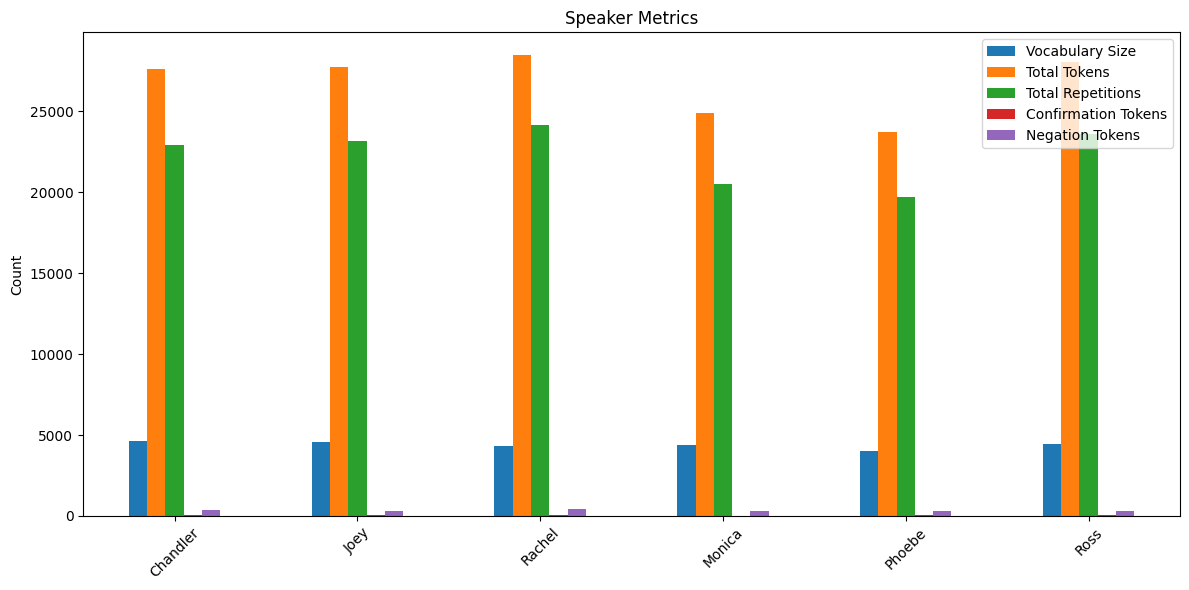

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re

def calculate_metrics(speaker_df):
    metrics = {}
    
    all_utterances = ' '.join(speaker_df[['Utterance_1', 'Utterance_2', 'Utterance_3']].fillna('').values.flatten())
    tokens = all_utterances.split()
    total_tokens = len(tokens)
    
    vocabulary_set = set(tokens)
    vocabulary_size = len(vocabulary_set)
    
    word_counts = Counter(tokens)
    total_repetitions = sum(count - 1 for count in word_counts.values() if count > 1)
    
    confirmation_words = {'yes', 'yeah', 'yep', 'okay', 'alright', 'sure', 'absolutely', 'certainly', 'of course', 'indeed', 'definitely'}
    negation_words = {'no', 'not', 'never', 'none', 'nor', 'nobody', 'neither', "don't", "isn't", "wasn't", "weren't", "doesn't", "won't", "haven't"}
    
    confirmation_count = sum(tokens.count(word) for word in confirmation_words)
    negation_count = sum(tokens.count(word) for word in negation_words)
    
    metrics['Vocabulary Size'] = vocabulary_size
    metrics['Total Tokens'] = total_tokens
    metrics['Total Repetitions'] = total_repetitions
    metrics['Confirmation Tokens'] = confirmation_count
    metrics['Negation Tokens'] = negation_count
    
    return metrics

def calculate_average_personality(speaker_df):
    personality_columns = ['Personality']
    averages = {trait: eval(speaker_df[trait].iloc[0]) for trait in personality_columns}
    return averages



df = pd.read_csv('Dyadic_PELD.tsv', sep='\t', header=0)
speakers = df['Speaker_1'].unique()
speaker_dfs = {speaker: df[df['Speaker_1'] == speaker] for speaker in speakers}

all_metrics = {}
all_personality_averages = {}

for speaker, speaker_df in speaker_dfs.items():
    metrics = calculate_metrics(speaker_df)
    all_metrics[speaker] = metrics
    
    personality_avg = calculate_average_personality(speaker_df)
    all_personality_averages[speaker] = personality_avg

for sp in all_metrics:
    print(f"{sp} ----> \t {all_metrics[sp]}")

for sp in all_personality_averages:
    print(f"{sp} ----> \t {all_personality_averages[sp]}")


df_metrics = pd.DataFrame(all_metrics).T
df_metrics.plot(kind='bar', figsize=(12, 6))
plt.title('Speaker Metrics')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
df.head()

,Speaker_1,Speaker_2,Personality,Utterance_1,Utterance_2,Utterance_3,Emotion_1,Emotion_2,Emotion_3,Sentiment_1,Sentiment_2,Sentiment_3
0,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",also I was the point person on my company s tr...,You must ve had your hands full.,That I did. That I did.,neutral,neutral,neutral,neutral,neutral,neutral
1,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",That I did. That I did.,So let s talk a little bit about your duties.,My duties? All right.,neutral,neutral,surprise,neutral,neutral,positive
2,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",My duties? All right.,"Now you ll be heading a whole division, so you...",I see.,surprise,neutral,neutral,positive,neutral,neutral
3,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",I see.,But there ll be perhaps 30 people under you so...,Good to know.,neutral,neutral,neutral,neutral,neutral,neutral
4,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",Good to know.,We can go into detail,No don t I beg of you!,neutral,neutral,fear,neutral,neutral,negative
